In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import norm

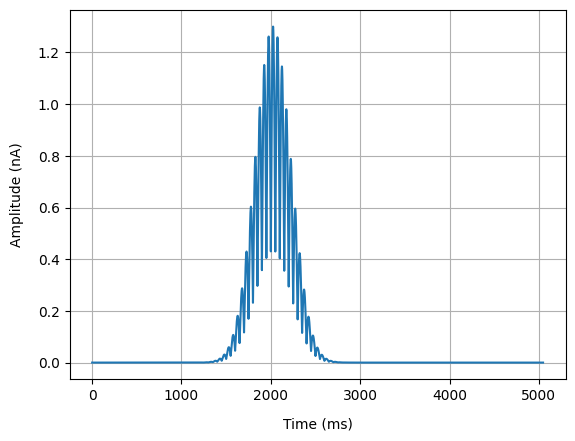

In [7]:

# Parameters
duration = 2.048  # in seconds, changed from milliseconds
sampling_rate = 1000  # samples per second, same as before
frequency = 10  # Hz
sigma = 0.2  # Standard deviation for Gaussian envelope, changed from milliseconds to seconds

# Time array
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)  # Using linspace to generate time array

# Gaussian envelope
gaussian = np.exp(-(t - duration/2)**2 / (2 * sigma**2))

# Sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Combine Gaussian and sine
signal = gaussian * sine_wave
signal = np.abs(signal)  # Take absolute value to ensure positive domain

# Create offset in signal
signal = signal+(gaussian/2)

# Add 0 in front and back

before_zeros = np.zeros(int(1000))
after_zeros = np.zeros(int(2000))

signal = np.concatenate((before_zeros, signal, after_zeros))

# Scaling
scale = 1.3
signal = signal / max(signal) * scale

# Plot
plt.plot(signal)
# plt.title('Epileptic Signal')
plt.xlabel('Time (ms)', labelpad=10)
plt.ylabel('Amplitude (nA)', labelpad=10)
plt.grid(True)
# plt.show()
plt.savefig(f'signal-{str(scale)}.png', bbox_inches='tight', dpi=300)

with open(f'signal-{str(scale)}.txt', 'w') as f:
    f.write("\n".join(map(str, signal)))
